In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics

from labs.util.file_processing.loader import load_from_csv
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [10]:
DATAFRAME_TRAIN_PATH: str = "/Users/astronely/PycharmProjects/DataAnalysisLabs/data-in/Training/Features_Variant_1.csv"
DATAFRAME_TEST_PATH: str = "/Users/astronely/PycharmProjects/DataAnalysisLabs/data-in/Testing/Features_TestSet.csv"
# ----------------------------------------------------------------------------------------------------------------------
df_train: pd.DataFrame = load_from_csv(path=DATAFRAME_TRAIN_PATH, delimiter=",")
target_df_train: pd.DataFrame = df_train['Target Variable']
feature_df_train: pd.DataFrame = df_train.drop(columns='Target Variable')

df_test: pd.DataFrame = load_from_csv(path=DATAFRAME_TEST_PATH, delimiter=",")
target_df_test: pd.DataFrame = df_test['Target Variable']
feature_df_test: pd.DataFrame = df_test.drop(columns='Target Variable')

tree_param = {'criterion': ['friedman_mse', 'squared_error'],
              'max_depth': [i for i in range(5, 20, 2)],
              'max_leaf_nodes': [i for i in range(20, 60, 10)],
              'min_samples_split': [i for i in range(20, 80, 10)]}

dtr_model = GridSearchCV(DecisionTreeRegressor(), tree_param, cv=10)

dtr_model.fit(X=feature_df_train, y=target_df_train)

Execution time for 'load_from_csv' took 0.12671613693237305 seconds
Execution time for 'load_from_csv' took 0.024783849716186523 seconds


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [10, 12, 14, 16, 18],
                         'max_leaf_nodes': [20, 30, 40, 50],
                         'min_samples_split': [20, 30, 40, 50, 60, 70]})

R-Squared::0.5189533081487296
Best Hyperparameters::
{'criterion': 'friedman_mse', 'max_depth': 10, 'max_leaf_nodes': 40, 'min_samples_split': 70}
MAE: 26.825388154192964
MSE: 26.825388154192964
RMSE: 5.179323136684268


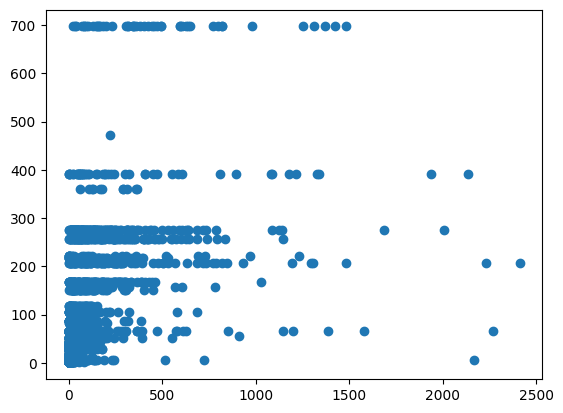

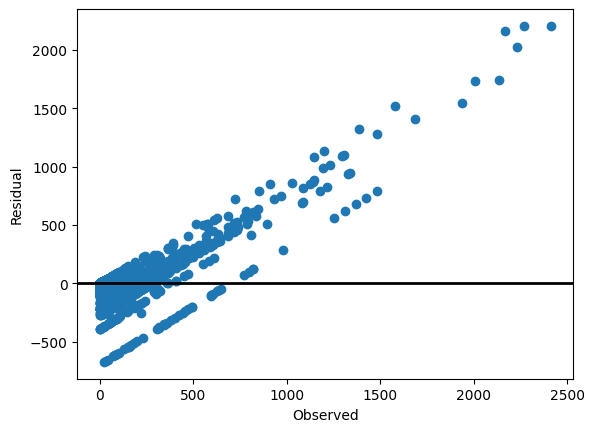

In [11]:
prediction = dtr_model.best_estimator_.predict(feature_df_test)
print("R-Squared::{}".format(dtr_model.best_score_))
print("Best Hyperparameters::\n{}".format(dtr_model.best_params_))

_MAE = metrics.mean_absolute_error(target_df_test, prediction)
_MSE = metrics.mean_absolute_error(target_df_test, prediction)
_RMSE = np.sqrt(_MSE)
print('MAE:', _MAE)
print('MSE:', _MSE)
print('RMSE:', _RMSE)

plt.scatter(target_df_test, prediction)

fig, ax = plt.subplots()
ax.scatter(target_df_test, target_df_test - prediction)
ax.axhline(lw=2, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()